In [ ]:
pip install pandas

**What is the shape of "movies.csv"?**


In [30]:
import pandas as pd

movies_df = pd.read_csv('movies.csv')
print("Shape of 'movies.csv':", movies_df.shape)


Shape of 'movies.csv': (9742, 3)


**What is the shape of "ratings.csv"?**
*

In [32]:
import pandas as pd

ratings_df = pd.read_csv('ratings.csv')

print("Shape of 'ratings.csv':", ratings_df.shape)


Shape of 'ratings.csv': (100836, 4)


**How many unique "userId" are available in "ratings.csv"?**


In [34]:
import pandas as pd

# Read the 'ratings.csv' file
ratings_df = pd.read_csv('ratings.csv')

unique_user_ids = ratings_df['userId'].unique()


num_unique_user_ids = len(unique_user_ids)

print("Number of unique userIds in 'ratings.csv':", num_unique_user_ids)


Number of unique userIds in 'ratings.csv': 610


**Which movie has recieved maximum number of user ratings?**

In [ ]:
import pandas as pd

ratings_df = pd.read_csv('ratings.csv')

movies_df = pd.read_csv('movies.csv')

movie_ratings = ratings_df.groupby('movieId')['rating'].sum()

# Find the movie with the maximum ratings
max_rated_movie_id = movie_ratings.idxmax()

max_rated_movie_title = movies_df[movies_df['movieId'] == max_rated_movie_id]['title'].iloc[0]

# Print the result
print("Movie with Maximum Ratings:")
print("Movie ID:", max_rated_movie_id)
print("Movie Title:", max_rated_movie_title)





Movie with Maximum Ratings:
Movie ID: 318
Movie Title: Shawshank Redemption, The (1994)


**Select all the correct tags submitted by users to "Matrix, The (1999)" movie?**

In [36]:
import pandas as pd


tags_df = pd.read_csv('tags.csv')

movies_df = pd.read_csv('movies.csv')

matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].iloc[0]

matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag']

print("Tags for 'Matrix, The (1999)':")
print(matrix_tags)


Tags for 'Matrix, The (1999)':
815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object


**What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?**

In [37]:
import pandas as pd


ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]
average_rating = ratings_df[ratings_df['movieId'] == terminator_movie_id]['rating'].mean()

# Print the result
print(f"Average User Rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")


Average User Rating for 'Terminator 2: Judgment Day (1991)': 3.97


**How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?**

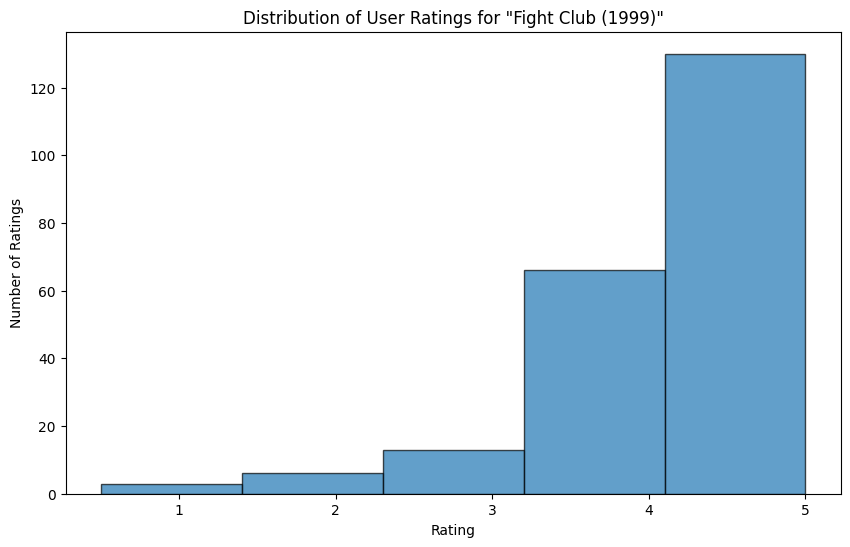

The distribution is negatively skewed.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt


ratings_df = pd.read_csv('ratings.csv')

movies_df = pd.read_csv('movies.csv')

fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].iloc[0]

fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings, bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

# Determine the type of distribution
mean_rating = fight_club_ratings.mean()
median_rating = fight_club_ratings.median()

if mean_rating > median_rating:
    print("The distribution is positively skewed.")
elif mean_rating < median_rating:
    print("The distribution is negatively skewed.")
else:
    print("The distribution is approximately symmetric.")


**Which movie is the most popular based on  average user ratings?**


In [ ]:
import pandas as pd

ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
grouped_ratings = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')
filtered_df = merged_df[merged_df['count'] > 50]

most_popular_movie = filtered_df[filtered_df['mean'] == filtered_df['mean'].max()]

# Print the result
print("Most Popular Movie based on Average User Ratings:")
print("Movie Title:", most_popular_movie['title'].iloc[0])
print("Average User Rating:", most_popular_movie['mean'].iloc[0])


Most Popular Movie based on Average User Ratings:
Movie Title: Shawshank Redemption, The (1994)
Average User Rating: 4.429022082018927


**Select all the correct options which comes under top 5 popular movies based on number of user ratings.**



In [39]:

ratings_df = pd.read_csv('ratings.csv')

movies_df = pd.read_csv('movies.csv')

grouped_ratings = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

filtered_df = merged_df[merged_df['count'] > 50]

# Top 5 popular movies based on number of user ratings
top_5_popular_movies = filtered_df.sort_values(by='count', ascending=False).head(5)

# Print the result
print("Top 5 Popular Movies based on Number of User Ratings:")
print(top_5_popular_movies[['title', 'count']])


Top 5 Popular Movies based on Number of User Ratings:
                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


**Which Sci-Fi movie is "third most popular" based on the number of user ratings?**

In [ ]:

ratings_df = pd.read_csv('ratings.csv')

movies_df = pd.read_csv('movies.csv')
grouped_ratings = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Step 2: Inner join with movies.csv
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter only those movies with more than 50 user ratings
filtered_df = merged_df[merged_df['count'] > 50]

# Filter Sci-Fi movies
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

sorted_sci_fi_movies = sci_fi_movies.sort_values(by='count', ascending=False)

# Get the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

# Print the result
print("Third Most Popular Sci-Fi Movie based on Number of User Ratings:")
print("Movie Title:", third_most_popular_sci_fi_movie['title'])
print("Number of User Ratings:", third_most_popular_sci_fi_movie['count'])


Third Most Popular Sci-Fi Movie based on Number of User Ratings:
Movie Title: Jurassic Park (1993)
Number of User Ratings: 238


**Mention the movieId of the movie which has the highest IMDB rating.**


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Read the 'links.csv' file
links_df = pd.read_csv('links.csv')

# Create an empty DataFrame to store movie ratings
imdb_ratings_df = pd.DataFrame(columns=['movieId', 'IMDbRating'])

# Function to scrape IMDb rating for a given IMDb ID
def scrape_imdb_rating(imdb_id):
    imdb_url = f'https://www.imdb.com/title/{imdb_id}/'
    response = requests.get(imdb_url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        rating_element = soup.find('span', {'itemprop': 'ratingValue'})

        if rating_element:
            imdb_rating = float(rating_element.text)
            return imdb_rating

    return None

# Loop through each row in 'links.csv' and scrape IMDb rating
for index, row in links_df.iterrows():
    movie_id = row['movieId']
    imdb_id = row['imdbId']

    imdb_rating = scrape_imdb_rating(imdb_id)

    if imdb_rating is not None:
        imdb_ratings_df = imdb_ratings_df.append({'movieId': movie_id, 'IMDbRating': imdb_rating}, ignore_index=True)

# Find the movie with the highest IMDb rating
highest_rated_movie = imdb_ratings_df.loc[imdb_ratings_df['IMDbRating'].idxmax()]

# Print the result
print("Movie with the Highest IMDb Rating:")
print("Movie ID:", int(highest_rated_movie['movieId']))
print("IMDb Rating:", highest_rated_movie['IMDbRating'])



**Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.**

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Read the 'links.csv' and 'movies.csv' files
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')

merged_df = pd.merge(links_df, movies_df, on='movieId')

sci_fi_movies_df = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

sci_fi_imdb_ratings_df = pd.DataFrame(columns=['movieId', 'IMDbRating'])


def scrape_imdb_rating(imdb_id):
    imdb_url = f'https://www.imdb.com/title/{imdb_id}/'
    response = requests.get(imdb_url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        rating_element = soup.find('span', {'itemprop': 'ratingValue'})

        if rating_element:
            imdb_rating = float(rating_element.text)
            return imdb_rating

    return None


for index, row in sci_fi_movies_df.iterrows():
    movie_id = row['movieId']
    imdb_id = row['imdbId']

    imdb_rating = scrape_imdb_rating(imdb_id)

    if imdb_rating is not None:
        sci_fi_imdb_ratings_df = sci_fi_imdb_ratings_df.append({'movieId': movie_id, 'IMDbRating': imdb_rating}, ignore_index=True)

# Find the Sci-Fi movie with the highest IMDb rating
highest_rated_sci_fi_movie = sci_fi_imdb_ratings_df.loc[sci_fi_imdb_ratings_df['IMDbRating'].idxmax()]

# Print the result
print("Sci-Fi Movie with the Highest IMDb Rating:")
print("Movie ID:", int(highest_rated_sci_fi_movie['movieId']))
print("IMDb Rating:", highest_rated_sci_fi_movie['IMDbRating'])
